# semi_project
### <Covid19 - Tiredness>


### csv 파일 불러오기

### 서울특별시 일별 승하차 총 승객수 시각화
1. 서울시 지하철역만 골라서 (for/if)
2. 일별 총 승하차승객수를 구하고
3. x = 일별, y = 총승객수 그래프로 시각화

In [81]:
# csv 파일 불러오기

import pandas as pd

file_path = './semi_data/CARD_SUBWAY_MONTH_202002.csv'
subData = pd.read_csv(file_path, encoding = 'utf_8')
print(subData.head())

       사용일자  노선명    역명  승차총승객수  하차총승객수      등록일자
0  20200201  1호선    시청   13966   14315  20200204
1  20200201  1호선    종각   24014   23628  20200204
2  20200201  1호선  종로3가   25613   24969  20200204
3  20200201  1호선  종로5가   19922   19765  20200204
4  20200201  1호선   동대문   11346   11210  20200204


In [82]:
print(subData.info)

<bound method DataFrame.info of            사용일자  노선명         역명  승차총승객수  하차총승객수      등록일자
0      20200201  1호선         시청   13966   14315  20200204
1      20200201  1호선         종각   24014   23628  20200204
2      20200201  1호선       종로3가   25613   24969  20200204
3      20200201  1호선       종로5가   19922   19765  20200204
4      20200201  1호선        동대문   11346   11210  20200204
...         ...  ...        ...     ...     ...       ...
17113  20200229  5호선        신금호    2661    2615  20200303
17114  20200229  5호선         행당    3217    2744  20200303
17115  20200229  5호선  왕십리(성동구청)    2175    2623  20200303
17116  20200229  5호선         마장    2531    2415  20200303
17117  20200229  5호선        답십리    6961    6437  20200303

[17118 rows x 6 columns]>


In [83]:
# '사용일자'로 그룹화
# groupby를 사용하면 기본으로 그룹라벨이 index가 됨 
# index를 사용하고 싶지 않은 경우 as_index = False 사용

# 새로운 컬럼
subData['승하차총승객수'] = subData['승차총승객수'] + subData['하차총승객수']
print(subData.head())

# 그룹별 집계하는 방법
subDay = subData.groupby(['사용일자'], as_index = False)['승하차총승객수'].sum()
print(subDay.head())
subDay.info() # 사용일자 타입이 int64 

# 사용일자 타입 날짜로 변환(int64 -> datetime)
subDay['사용일자'] = pd.to_datetime(subDay['사용일자'].astype('str'),errors = 'coerce')
subDay.info()
print(subDay['승하차총승객수'].max())

       사용일자  노선명    역명  승차총승객수  하차총승객수      등록일자  승하차총승객수
0  20200201  1호선    시청   13966   14315  20200204    28281
1  20200201  1호선    종각   24014   23628  20200204    47642
2  20200201  1호선  종로3가   25613   24969  20200204    50582
3  20200201  1호선  종로5가   19922   19765  20200204    39687
4  20200201  1호선   동대문   11346   11210  20200204    22556
       사용일자   승하차총승객수
0  20200201   9802719
1  20200202   7006847
2  20200203  13994343
3  20200204  14141705
4  20200205  13785128
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   사용일자     29 non-null     int64
 1   승하차총승객수  29 non-null     int64
dtypes: int64(2)
memory usage: 696.0 bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   사용일자     29 non-null     datetime6

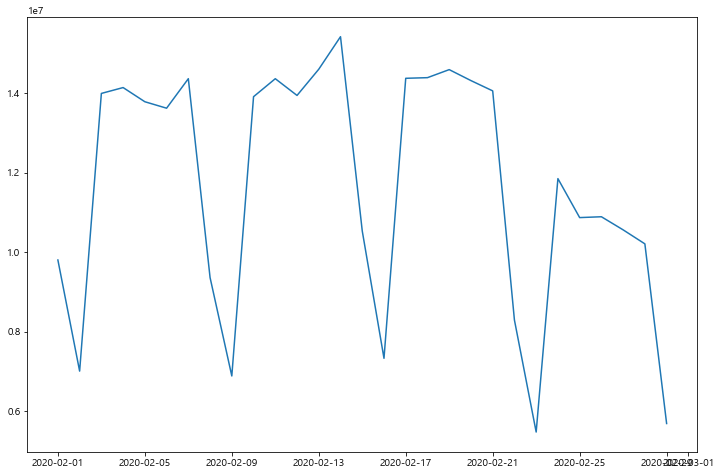

In [84]:
# 시각화하기

import numpy as np
import matplotlib.pyplot as plt

plt.plot(subDay['사용일자'], subDay['승하차총승객수'])
plt.show()

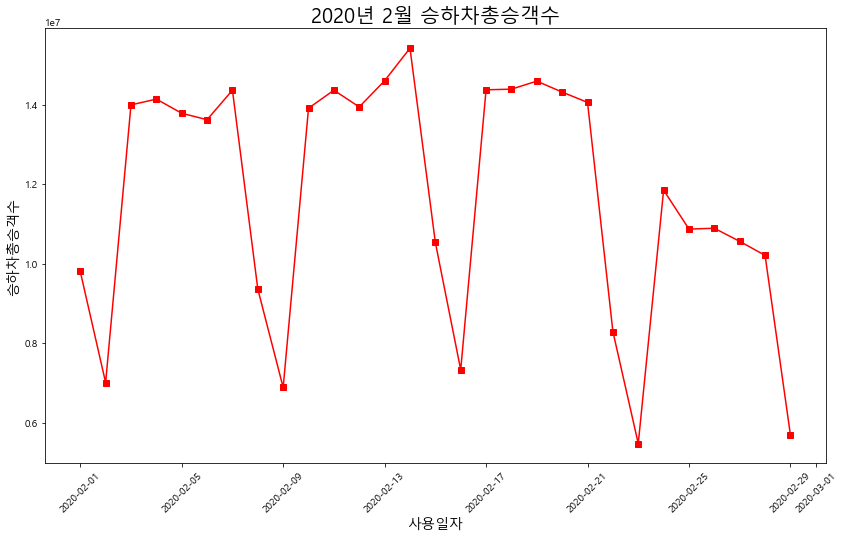

In [85]:
# 시각화하기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
 
fig = plt.figure(figsize=(14,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(subDay['사용일자'],subDay['승하차총승객수'], marker='s', color='r') ## 선그래프 생성
plt.ylabel('승하차총승객수', fontsize=14)
plt.xlabel('사용일자', fontsize=14)
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.title('2020년 2월 승하차총승객수',fontsize=20) ## 타이틀 설정
plt.show()

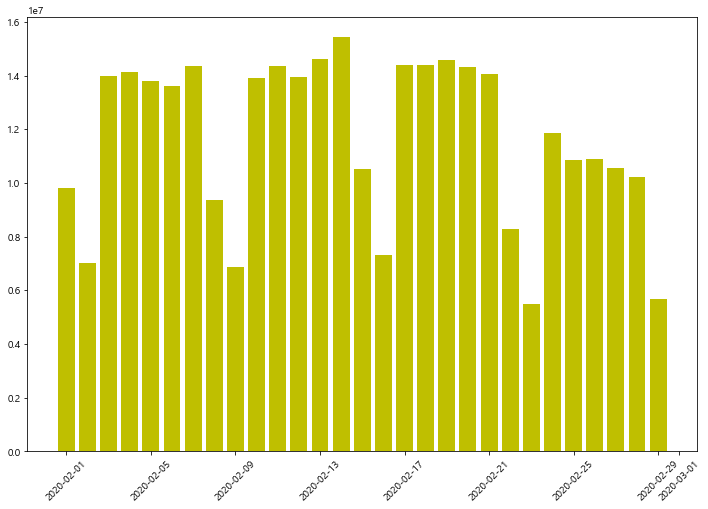

In [86]:
# 막대그래프 시각화
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

plt.figure()
plt.bar(subDay['사용일자'],subDay['승하차총승객수'],color='y')
plt.xticks(rotation=45)
plt.show()

### 서울시에 있는 역만 추출

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def file_open():  # 파일 읽어오기
    file_path = '.\semi_data\CARD_SUBWAY_MONTH_202002.csv'
    #    file_path2 = '.\semi_data\CARD_SUBWAY_MONTH_202003.csv'
    pdata = pd.read_csv(file_path, encoding = 'utf-8')
    #    pdata2 = pd.read_csv(file_path2, encoding = 'CP949')
    
    print(pdata.head())
    print()
#    print("3호선의 승차총승객수의 합을 구하시오")
#    mean3 = pdata[pdata["노선명"] == '3호선']["승차총승객수"].sum()
#    print(mean3)
    
    # 역명 뽑아내기
    station = pdata["역명"].unique() # 중복값제거
#    print(station)
    
    seoul_station = ["가락시장", "가산디지털단지", "가양", "가오리", "가좌", "강남", "강남구청", "강동", "강동구청", "강변", "강일", "개롱", "개봉", "개포동",
                     "개화", "개화산", "거여", "건대입구", "경복궁", "경찰병원", "고덕", "고려대", "고속터미널", "공덕", "공릉", "공항시장", "광나루", "광운대",
                     "광화문", "광흥창", "교대", "구로", "구로디지털단지", "구룡", "구반포", "구산", "구의", "구일", "구파발", "국회의사당", "군자", "굽은다리",
                     "금천구청", "금호", "길동", "길음", "김포공항", "까치산", "낙성대", "남구로", "남부터미널", "남성", "남영", "남태령", "내방", "노들",
                     "노량진", "노원", "녹번", "녹사평", "녹천", "논현", "답십리", "당고개", "당산", "대림", "대모산입구", "대방", "대청", "대치", "대흥",
                     "도곡", "도림천", "도봉", "도봉산", "독립문", "독바위", "독산", "돌곶이", "동대문", "동대문역사문화공원", "동대입구", "동묘앞", "동작",
                     "둔촌동", "둔촌오륜", "등촌", "디지털미디어시티", "뚝섬", "뚝섬유원지", "마곡", "마곡나루", "마들", "마장", "마천", "마포", "마포구청", "망우",
                     "망원", "매봉", "먹골", "면목", "명동", "명일", "목동", "몽촌토성", "무악재", "문래", "문정", "미아", "미아사거리", "반포", "발산",
                     "방배", "방이", "방학", "방화", "버티고개", "보라매", "보문", "복정", "봉은사", "봉천", "봉화산", "북한산보국문", "북한산우이", "불광",
                     "사가정", "사당", "사평", "삼각지", "삼성", "삼성중앙", "삼양", "삼양사거리", "삼전", "상계", "상도", "상봉", "상수", "상왕십리", "상월곡",
                     "상일동", "새절", "샛강", "서강대", "서대문", "서빙고", "서울대입구", "서울숲", "서울역", "서초", "석계", "석촌", "석촌고분", "선릉",
                     "선유도", "선정릉", "성수", "성신여대입구", "솔샘", "솔밭공원", "송정", "송파", "송파나루", "수락산", "수색", "수서", "수유", "숙대입구",
                     "숭실대입구", "시청", "신금호", "신길", "신내", "신논현", "신답", "신당", "신대방", "신대방삼거리", "신도림", "신림", "신목동", "신반포",
                     "신방화", "신사", "신설동", "신용산", "신이문", "신정", "신정네거리", "신촌(2)", "신촌(경)", "신풍", "쌍문", "아차산", "아현", "안국",
                     "안암", "암사", "압구정", "압구정로데오", "애오개", "약수", "양원", "양재", "양재시민의숲", "양천구청", "양천향교", "양평(5)", "어린이대공원",
                     "언주", "여의나루", "여의도", "역삼", "역촌", "연신내", "염창", "영등포", "영등포구청", "영등포시장", "오금", "오류동", "오목교", "옥수",
                     "온수", "올림픽공원", "왕십리", "외대앞", "용답", "용두", "용마산", "용산", "우장산", "월계", "월곡", "월드컵경기장", "을지로입구",
                     "을지로3가", "을지로4가", "응봉", "응암", "이대", "이수", "이촌", "이태원", "일원", "잠실", "잠실나루", "잠실새내", "잠원", "장승배기",
                     "장지", "장한평", "정릉", "제기동", "종각", "종로3가", "종로5가", "종합운동장", "중계", "중곡", "중랑", "중앙보훈병원", "중화", "증미",
                     "증산", "창동", "창신", "천왕", "천호", "청구", "청담", "청량리", "충무로", "충정로", "태릉입구", "하계", "학동", "학여울", "한강진",
                     "한남", "한성대입구", "한성백제", "한양대", "한티", "합정", "행당", "혜화", "홍대입구", "홍제", "화계", "화곡", "화랑대", "회기", "회현",
                     "효창공원앞", "흑석"]
    print("역숫자:",len(station), "서울시역숫자:",len(seoul_station))
    cnt = 0 
    st = []
    for i in station:
        if i in seoul_station :
            cnt += 1 
    print(cnt)
    


file_open()

       사용일자  노선명    역명  승차총승객수  하차총승객수      등록일자
0  20200201  1호선    시청   13966   14315  20200204
1  20200201  1호선    종각   24014   23628  20200204
2  20200201  1호선  종로3가   25613   24969  20200204
3  20200201  1호선  종로5가   19922   19765  20200204
4  20200201  1호선   동대문   11346   11210  20200204

역숫자: 509 서울시역숫자: 298
243


### 서울특별시 월별 유동인구 csv파일 합치기
1. 여러 개의 csv 파일 하나의 데이터프레임으로 합치기
2. 서울시에 있는 역만 추출
3. 일별로 그룹화하고 승하차총승객수구하기
4. 시각화

In [88]:
# 여러 개의 csv파일을 하나의 데이터프레임으로 합치기
import pandas as pd 
from glob import glob # 파일 경로 조작가능
import chardet

# 파일 여러개 한 번에 불러오기
# 불러올 파일 리스트를 forder에 저장
# 해당 디렉토리 내에 .CSV 파일을 다 불러와서 리스트에 넣어준다
forder = glob('C:\\Users\\82102\\PycharmProjects\\python_base\\semi_data\\*.csv')
print(forder)
subwayData = [] 

# 인코딩 확인 코드(불러오고자하는 파일의 인코딩 설정이 다 다름)
for files in forder:
        rawdata = open(files, 'rb').read() #파일 열고
        test = chardet.detect(rawdata) # 인코딩 형식 검사하고
        result = test['encoding']  # 인코딩 결과 확인하고
        print(result) 

for files in forder:
    df = pd.read_csv(files, encoding = result,index_col=False) #위에서 확인한 인코딩을 넣어서 append
    subwayData.append(df)
    
allData = pd.concat(subwayData ,ignore_index=True )
print(allData.tail())

['C:\\Users\\82102\\PycharmProjects\\python_base\\semi_data\\CARD_SUBWAY_MONTH_202002.csv', 'C:\\Users\\82102\\PycharmProjects\\python_base\\semi_data\\CARD_SUBWAY_MONTH_202003.csv', 'C:\\Users\\82102\\PycharmProjects\\python_base\\semi_data\\CARD_SUBWAY_MONTH_202004.csv', 'C:\\Users\\82102\\PycharmProjects\\python_base\\semi_data\\CARD_SUBWAY_MONTH_202005.csv', 'C:\\Users\\82102\\PycharmProjects\\python_base\\semi_data\\CARD_SUBWAY_MONTH_202006.csv', 'C:\\Users\\82102\\PycharmProjects\\python_base\\semi_data\\CARD_SUBWAY_MONTH_202007.csv', 'C:\\Users\\82102\\PycharmProjects\\python_base\\semi_data\\CARD_SUBWAY_MONTH_202008.csv', 'C:\\Users\\82102\\PycharmProjects\\python_base\\semi_data\\CARD_SUBWAY_MONTH_202009.csv', 'C:\\Users\\82102\\PycharmProjects\\python_base\\semi_data\\CARD_SUBWAY_MONTH_202010.csv', 'C:\\Users\\82102\\PycharmProjects\\python_base\\semi_data\\CARD_SUBWAY_MONTH_202011.csv', 'C:\\Users\\82102\\PycharmProjects\\python_base\\semi_data\\CARD_SUBWAY_MONTH_202012.csv'

### 서울에 있는 역만 추출하기

In [89]:
# 서울에있는 역만 추출

forder = glob('C:\\Users\\82102\\PycharmProjects\\python_base\\semi_data\\*.csv')

subwaySt = pd.DataFrame()  # 데이터프레임생성
for files in forder:
    df = pd.read_csv(files, encoding = result,index_col=False)  # 202002~04/09/까지 encoding 설정이 다름
    subwayData.append(df)
    subwaySt = pd.concat(subwayData ,ignore_index=True )
    
seoul_station = ["가락시장", "가산디지털단지", "가양", "가오리", "가좌", "강남", "강남구청", "강동", "강동구청", "강변", "강일", "개롱", "개봉", "개포동", "개화",
                 "개화산", "거여", "건대입구", "경복궁", "경찰병원", "고덕", "고려대", "고속터미널", "공덕", "공릉", "공항시장", "광나루", "광운대", "광화문",
                 "광흥창", "교대", "구로", "구로디지털단지", "구룡", "구반포", "구산", "구의", "구일", "구파발", "국회의사당", "군자", "굽은다리", "금천구청",
                 "금호", "길동", "길음", "김포공항", "까치산", "낙성대", "남구로", "남부터미널", "남성", "남영", "남태령", "내방", "노들", "노량진", "노원",
                 "녹번", "녹사평", "녹천", "논현", "답십리", "당고개", "당산", "대림", "대모산입구", "대방", "대청", "대치", "대흥", "도곡", "도림천", "도봉",
                 "도봉산", "독립문", "독바위", "독산", "돌곶이", "동대문", "동대문역사문화공원", "동대입구", "동묘앞", "동작", "둔촌동", "둔촌오륜", "등촌",
                 "디지털미디어시티", "뚝섬", "뚝섬유원지", "마곡", "마곡나루", "마들", "마장", "마천", "마포", "마포구청", "망우", "망원", "매봉", "먹골", "면목",
                 "명동", "명일", "목동", "몽촌토성", "무악재", "문래", "문정", "미아", "미아사거리", "반포", "발산", "방배", "방이", "방학", "방화", "버티고개",
                 "보라매", "보문", "복정", "봉은사", "봉천", "봉화산", "북한산보국문", "북한산우이", "불광", "사가정", "사당", "사평", "삼각지", "삼성", "삼성중앙",
                 "삼양", "삼양사거리", "삼전", "상계", "상도", "상봉", "상수", "상왕십리", "상월곡", "상일동", "새절", "샛강", "서강대", "서대문", "서빙고",
                 "서울대입구", "서울숲", "서울역", "서초", "석계", "석촌", "석촌고분", "선릉", "선유도", "선정릉", "성수", "성신여대입구", "솔샘", "솔밭공원",
                 "송정", "송파", "송파나루", "수락산", "수색", "수서", "수유", "숙대입구", "숭실대입구", "시청", "신금호", "신길", "신내", "신논현", "신답",
                 "신당", "신대방", "신대방삼거리", "신도림", "신림", "신목동", "신반포", "신방화", "신사", "신설동", "신용산", "신이문", "신정", "신정네거리",
                 "신촌(2)", "신촌(경)", "신풍", "쌍문", "아차산", "아현", "안국", "안암", "암사", "압구정", "압구정로데오", "애오개", "약수", "양원", "양재",
                 "양재시민의숲", "양천구청", "양천향교", "양평(5)", "어린이대공원", "언주", "여의나루", "여의도", "역삼", "역촌", "연신내", "염창", "영등포",
                 "영등포구청", "영등포시장", "오금", "오류동", "오목교", "옥수", "온수", "올림픽공원", "왕십리", "외대앞", "용답", "용두", "용마산", "용산",
                 "우장산", "월계", "월곡", "월드컵경기장", "을지로입구", "을지로3가", "을지로4가", "응봉", "응암", "이대", "이수", "이촌", "이태원", "일원",
                 "잠실", "잠실나루", "잠실새내", "잠원", "장승배기", "장지", "장한평", "정릉", "제기동", "종각", "종로3가", "종로5가", "종합운동장", "중계",
                 "중곡", "중랑", "중앙보훈병원", "중화", "증미", "증산", "창동", "창신", "천왕", "천호", "청구", "청담", "청량리", "충무로", "충정로",
                 "태릉입구", "하계", "학동", "학여울", "한강진", "한남", "한성대입구", "한성백제", "한양대", "한티", "합정", "행당", "혜화", "홍대입구", "홍제",
                 "화계", "화곡", "화랑대", "회기", "회현", "효창공원앞", "흑석"]

# 엑셀의 전체 역들 중복제거
station = subwaySt["역명"].unique()
print(len(station), len(seoul_station))

cnt = 0
same_st = []
for j in seoul_station:  # 여기서 단어를 비교
    for i in station:  # () 가 추가로 붙어있음
        # print(j.find(i))
        if i.find(j) == 0 and i not in same_st:
            if i == j:
                same_st.append(i)
            elif i.find(j + "(") == 0:
                same_st.append(i)
            else:
                pass
        elif i == "신촌" and j == "신촌(2)":
            same_st.append(j)
        elif i == "신촌" and j == "신촌(경)":
            same_st.append(j)
        elif i == "양평" and j == "양평(5)":
            same_st.append(j)

print(len(same_st))
for i in same_st:
    st = i
    print(st)

526 298
301
가락시장
가산디지털단지
가양
가오리
가좌
강남
강남구청
강동
강동구청
강변(동서울터미널)
강일
개롱
개봉
개포동
개화
개화산
거여
건대입구
경복궁(정부서울청사)
경찰병원
고덕
고려대(종암)
고속터미널
공덕
공릉(서울과학기술대)
공항시장
광나루(장신대)
광운대
광화문(세종문화회관)
광흥창(서강)
교대(법원.검찰청)
구로
구로디지털단지
구룡
구반포
구산
구의(광진구청)
구일
구파발
국회의사당
군자(능동)
굽은다리(강동구민회관앞)
금천구청
금호
길동
길음
김포공항
까치산
낙성대
낙성대(강감찬)
남구로
남부터미널(예술의전당)
남성
남영
남태령
내방
노들
노량진
노원
녹번
녹사평(용산구청)
녹천
논현
답십리
당고개
당산
대림(구로구청)
대모산입구
대방
대청
대치
대흥(서강대앞)
도곡
도림천
도봉
도봉산
독립문
독바위
독산
돌곶이
동대문
동대문역사문화공원
동대문역사문화공원(DDP)
동대입구
동묘앞
동작(현충원)
둔촌동
둔촌오륜
등촌
디지털미디어시티
뚝섬
뚝섬유원지
마곡
마곡나루
마곡나루(서울식물원)
마들
마장
마천
마포
마포구청
망우
망원
매봉
먹골
면목
명동
명일
목동
몽촌토성(평화의문)
무악재
문래
문정
미아(서울사이버대학)
미아사거리
반포
발산
방배
방이
방학
방화
버티고개
보라매
보문
복정
봉은사
봉천
봉화산(서울의료원)
북한산보국문
북한산우이
불광
사가정
사당
사평
삼각지
삼성(무역센터)
삼성중앙
삼양
삼양사거리
삼전
상계
상도
상봉(시외버스터미널)
상수
상왕십리
상월곡(한국과학기술연구원)
상일동
새절(신사)
샛강
서강대
서대문
서빙고
서울대입구(관악구청)
서울숲
서울역
서초
석계
석촌
석촌고분
선릉
선유도
선정릉
성수
성신여대입구(돈암)
솔샘
솔밭공원
송정
송파
송파나루
수락산
수색
수서
수유(강북구청)
숙대입구(갈월)
숭실대입구(살피재)
시청
신금호
신길
신내
신논현
신답
신당
신대방
신대방삼거리
신도림
신림
신목동
신반포
신방화
신사
신설동
신용산
신이문
신정(은행정)
신정네거리
신촌(2)
신촌(경)
신풍
쌍문
아차산(어린이대공원후문)

In [90]:

# 서울에있는 역만 추출
subwaySt = pd.DataFrame()  # 데이터프레임생성
for files in forder:
    data = pd.read_csv(files, encoding='utf_8', index_col=False)  # 202002~04/09/까지 encoding 설정이 다름
    subwaySt = pd.concat([subwaySt, data])
seoul_station = ["가락시장", "가산디지털단지", "가양", "가오리", "가좌", "강남", "강남구청", "강동", "강동구청", "강변", "강일", "개롱", "개봉", "개포동", "개화",
                 "개화산", "거여", "건대입구", "경복궁", "경찰병원", "고덕", "고려대", "고속터미널", "공덕", "공릉", "공항시장", "광나루", "광운대", "광화문",
                 "광흥창", "교대", "구로", "구로디지털단지", "구룡", "구반포", "구산", "구의", "구일", "구파발", "국회의사당", "군자", "굽은다리", "금천구청",
                 "금호", "길동", "길음", "김포공항", "까치산", "낙성대", "남구로", "남부터미널", "남성", "남영", "남태령", "내방", "노들", "노량진", "노원",
                 "녹번", "녹사평", "녹천", "논현", "답십리", "당고개", "당산", "대림", "대모산입구", "대방", "대청", "대치", "대흥", "도곡", "도림천", "도봉",
                 "도봉산", "독립문", "독바위", "독산", "돌곶이", "동대문", "동대문역사문화공원", "동대입구", "동묘앞", "동작", "둔촌동", "둔촌오륜", "등촌",
                 "디지털미디어시티", "뚝섬", "뚝섬유원지", "마곡", "마곡나루", "마들", "마장", "마천", "마포", "마포구청", "망우", "망원", "매봉", "먹골", "면목",
                 "명동", "명일", "목동", "몽촌토성", "무악재", "문래", "문정", "미아", "미아사거리", "반포", "발산", "방배", "방이", "방학", "방화", "버티고개",
                 "보라매", "보문", "복정", "봉은사", "봉천", "봉화산", "북한산보국문", "북한산우이", "불광", "사가정", "사당", "사평", "삼각지", "삼성", "삼성중앙",
                 "삼양", "삼양사거리", "삼전", "상계", "상도", "상봉", "상수", "상왕십리", "상월곡", "상일동", "새절", "샛강", "서강대", "서대문", "서빙고",
                 "서울대입구", "서울숲", "서울역", "서초", "석계", "석촌", "석촌고분", "선릉", "선유도", "선정릉", "성수", "성신여대입구", "솔샘", "솔밭공원",
                 "송정", "송파", "송파나루", "수락산", "수색", "수서", "수유", "숙대입구", "숭실대입구", "시청", "신금호", "신길", "신내", "신논현", "신답",
                 "신당", "신대방", "신대방삼거리", "신도림", "신림", "신목동", "신반포", "신방화", "신사", "신설동", "신용산", "신이문", "신정", "신정네거리",
                 "신촌(2)", "신촌(경)", "신풍", "쌍문", "아차산", "아현", "안국", "안암", "암사", "압구정", "압구정로데오", "애오개", "약수", "양원", "양재",
                 "양재시민의숲", "양천구청", "양천향교", "양평(5)", "어린이대공원", "언주", "여의나루", "여의도", "역삼", "역촌", "연신내", "염창", "영등포",
                 "영등포구청", "영등포시장", "오금", "오류동", "오목교", "옥수", "온수", "올림픽공원", "왕십리", "외대앞", "용답", "용두", "용마산", "용산",
                 "우장산", "월계", "월곡", "월드컵경기장", "을지로입구", "을지로3가", "을지로4가", "응봉", "응암", "이대", "이수", "이촌", "이태원", "일원",
                 "잠실", "잠실나루", "잠실새내", "잠원", "장승배기", "장지", "장한평", "정릉", "제기동", "종각", "종로3가", "종로5가", "종합운동장", "중계",
                 "중곡", "중랑", "중앙보훈병원", "중화", "증미", "증산", "창동", "창신", "천왕", "천호", "청구", "청담", "청량리", "충무로", "충정로",
                 "태릉입구", "하계", "학동", "학여울", "한강진", "한남", "한성대입구", "한성백제", "한양대", "한티", "합정", "행당", "혜화", "홍대입구", "홍제",
                 "화계", "화곡", "화랑대", "회기", "회현", "효창공원앞", "흑석"]

# 엑셀의 전체 역들 중복제거
station = subwaySt["역명"].unique()
print(len(station), len(seoul_station))

cnt = 0
same_st = []
for j in seoul_station:  # 여기서 단어를 비교
    for i in station:  # () 가 추가로 붙어있음
        # print(j.find(i))
        if i.find(j) == 0 and i not in same_st:
            if i == j:
                same_st.append(i)
            elif i.find(j + "(") == 0:
                same_st.append(i)
            else:
                pass
        elif i == "신촌" and j == "신촌(2)":
            same_st.append(j)
        elif i == "신촌" and j == "신촌(경)":
            same_st.append(j)
        elif i == "양평" and j == "양평(5)":
            same_st.append(j)

print(len(same_st))
st = []
for i in same_st:
    st.append(i)
print(st)

# allData['역명'] 이 조건(st에 있는 역명과 같은)에 부합하는 역의 데이터만 추출
# true/false

is_seoul = allData['역명'].isin(st)
print(is_seoul)

seoulSubway = allData[is_seoul] 


526 298
301
['가락시장', '가산디지털단지', '가양', '가오리', '가좌', '강남', '강남구청', '강동', '강동구청', '강변(동서울터미널)', '강일', '개롱', '개봉', '개포동', '개화', '개화산', '거여', '건대입구', '경복궁(정부서울청사)', '경찰병원', '고덕', '고려대(종암)', '고속터미널', '공덕', '공릉(서울과학기술대)', '공항시장', '광나루(장신대)', '광운대', '광화문(세종문화회관)', '광흥창(서강)', '교대(법원.검찰청)', '구로', '구로디지털단지', '구룡', '구반포', '구산', '구의(광진구청)', '구일', '구파발', '국회의사당', '군자(능동)', '굽은다리(강동구민회관앞)', '금천구청', '금호', '길동', '길음', '김포공항', '까치산', '낙성대', '낙성대(강감찬)', '남구로', '남부터미널(예술의전당)', '남성', '남영', '남태령', '내방', '노들', '노량진', '노원', '녹번', '녹사평(용산구청)', '녹천', '논현', '답십리', '당고개', '당산', '대림(구로구청)', '대모산입구', '대방', '대청', '대치', '대흥(서강대앞)', '도곡', '도림천', '도봉', '도봉산', '독립문', '독바위', '독산', '돌곶이', '동대문', '동대문역사문화공원', '동대문역사문화공원(DDP)', '동대입구', '동묘앞', '동작(현충원)', '둔촌동', '둔촌오륜', '등촌', '디지털미디어시티', '뚝섬', '뚝섬유원지', '마곡', '마곡나루', '마곡나루(서울식물원)', '마들', '마장', '마천', '마포', '마포구청', '망우', '망원', '매봉', '먹골', '면목', '명동', '명일', '목동', '몽촌토성(평화의문)', '무악재', '문래', '문정', '미아(서울사이버대학)', '미아사거리', '반포', '발산', '방배', '방이', '방학', '방화', '버티고개', '보라매', '보문', '복정'

### 지하철 역 자치구별로 나누기

In [91]:
file = 'C:\\Users\\82102\\PycharmProjects\\python_base\\data\\서울역.csv'
seoul = pd.read_csv(file, encoding='utf_8', index_col=False)
# print(seoul.info())
print(seoul.head())
print()
# 자치구 파일과 기존 seoulSubway 파일을 하나로 합치기(역명 기준)

seoulSubway = pd.merge(seoulSubway,seoul, on='역명', how='left')
print(seoulSubway)

        역명    자치구
0     가락시장    송파구
1  가산디지털단지    금천구
2       가양    강서구
3      가오리    강북구
4       가좌   서대문구

            사용일자  노선명         역명  승차총승객수  하차총승객수      등록일자    자치구
0       20200201  1호선         시청   13966   14315  20200204     중구
1       20200201  1호선         종각   24014   23628  20200204    종로구
2       20200201  1호선       종로3가   25613   24969  20200204    종로구
3       20200201  1호선       종로5가   19922   19765  20200204    종로구
4       20200201  1호선        동대문   11346   11210  20200204    종로구
...          ...  ...        ...     ...     ...       ...    ...
201289  20210731  중앙선         회기   13250   12520  20210803   동대문구
201290  20210731  4호선  회현(남대문시장)   12413   13193  20210803     중구
201291  20210731  경의선      효창공원앞    1299    1454  20210803    용산구
201292  20210731  6호선      효창공원앞    3313    2828  20210803    용산구
201293  20210731  9호선  흑석(중앙대입구)    3689    3787  20210803    동작구

[201294 rows x 7 columns]


#### 일자별 x 총승객수 그룹화(subDay)

In [92]:
# 사용일자로 그룹화
seoulSubway['승하차총승객수'] = seoulSubway['승차총승객수'] + seoulSubway['하차총승객수']
# print(seoulSubway.head())

# 그룹별 집계하는 방법 - 일자별 집계
subDay = seoulSubway.groupby(['사용일자'], as_index = False)['승하차총승객수'].sum()
# print(subDay.head())
subDay.info() # 사용일자 타입이 int64

# 사용일자 타입 날짜로 변환(int64 -> datetime)
subDay["사용일자"] = pd.to_datetime(subDay["사용일자"], format='%Y%m%d')
print(subDay.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   사용일자     547 non-null    int64
 1   승하차총승객수  547 non-null    int64
dtypes: int64(2)
memory usage: 12.8 KB
          사용일자  승하차총승객수
542 2021-07-27  8394807
543 2021-07-28  8361133
544 2021-07-29  8270860
545 2021-07-30  8436558
546 2021-07-31  4948883


#### 일자별 & 자치구별 x 총승객수 그룹화(subArea)

In [95]:
# 일자별, 자치구별 group 승하차총승객수 

# 그룹별 집계하는 방법 - 일자별 집계
subArea = seoulSubway.groupby([seoulSubway['자치구'],seoulSubway['사용일자']], as_index = False)['승하차총승객수'].sum()
# print(subArea.head())
# subArea.info() # 사용일자 타입이 int64

# 사용일자 타입 날짜로 변환(int64 -> datetime)
subArea["사용일자"] = pd.to_datetime(subArea["사용일자"], format='%Y%m%d')
print(subArea.head())

    자치구       사용일자  승하차총승객수
0   강남구 2020-02-01   793428
1   강남구 2020-02-02   479389
2   강남구 2020-02-03  1382648
3   강남구 2020-02-04  1409308
4   강남구 2020-02-05  1390449


### 자치구별 승하차총승객수 시각화
https://rfriend.tistory.com/417

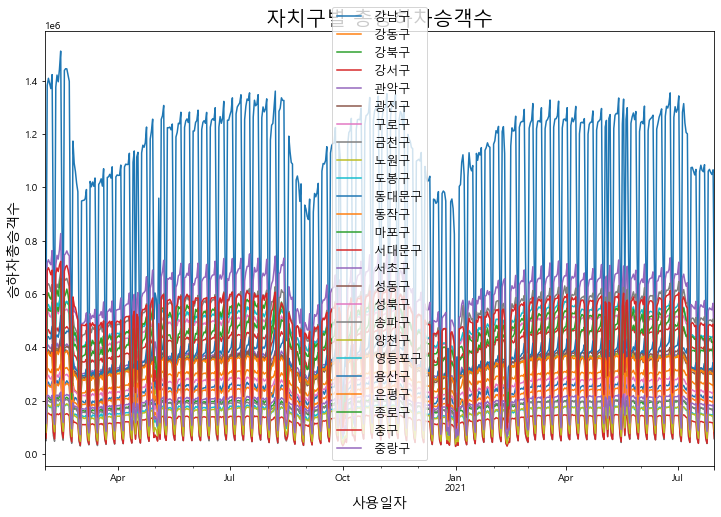

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

fig, ax = plt.subplots()

for key, grp in subArea.groupby('자치구'):

    ax = grp.plot(ax=ax, kind='line', x='사용일자', y='승하차총승객수', label=key)



plt.title('자치구별 총승하차승객수', fontsize=20)

plt.xlabel('사용일자', fontsize=14)

plt.ylabel('승하차총승객수', fontsize=14)

plt.legend(fontsize=12, loc='best')

plt.show()


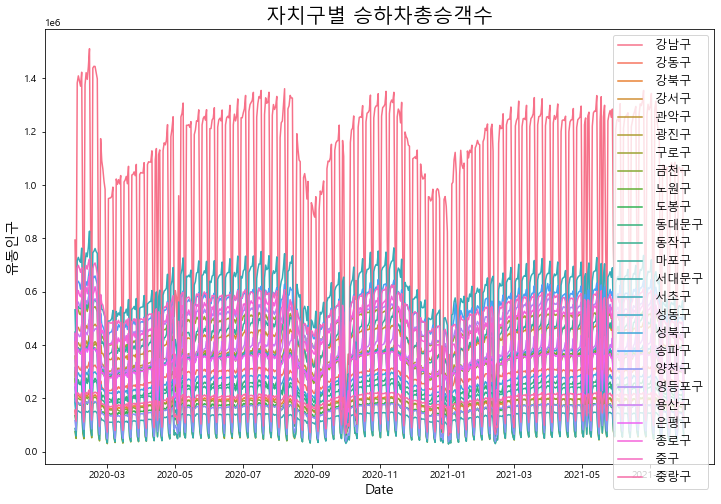

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', family='Malgun Gothic')

ax = sns.lineplot(x='사용일자', 

                  y='승하차총승객수', 

                  hue='자치구',

                  data=subArea)



plt.title('자치구별 승하차총승객수', fontsize=20)

plt.ylabel('유동인구', fontsize=14)

plt.xlabel('Date', fontsize=14)

plt.legend(fontsize=12, loc='best')



plt.show()


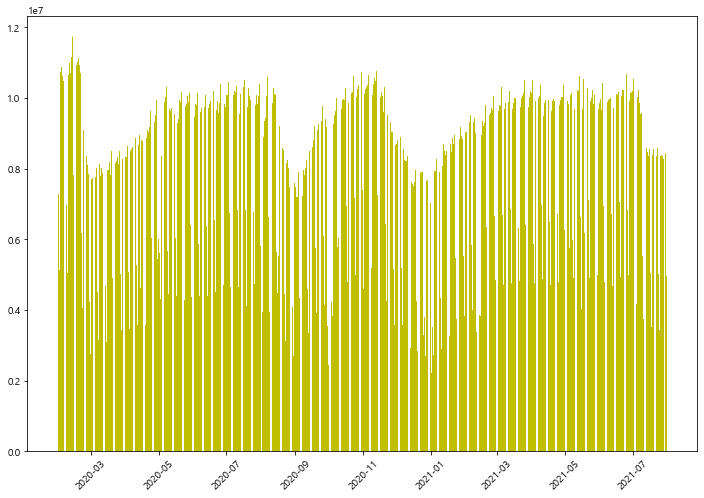

In [55]:

# 막대그래프 시각화
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

plt.figure()
plt.bar(subDay['사용일자'],subDay['승하차총승객수'],color='y')
plt.xticks(rotation=45)
plt.show()

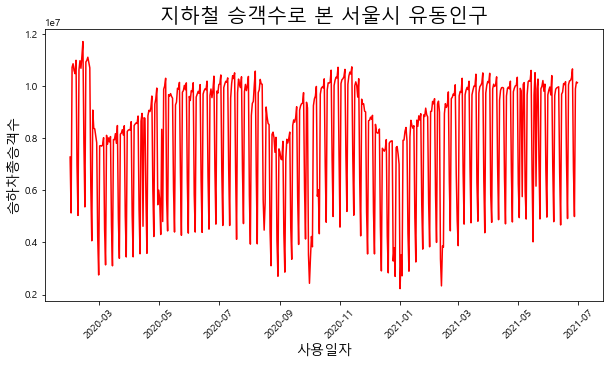

In [61]:
# 시각화하기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
 
fig = plt.figure(figsize=(10,5)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(subDay['사용일자'],subDay['승하차총승객수'], color='r') ## 선그래프 생성
plt.ylabel('승하차총승객수', fontsize=14)
plt.xlabel('사용일자', fontsize=14)
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.title('지하철 승객수로 본 서울시 유동인구',fontsize=20) ## 타이틀 설정
plt.show()

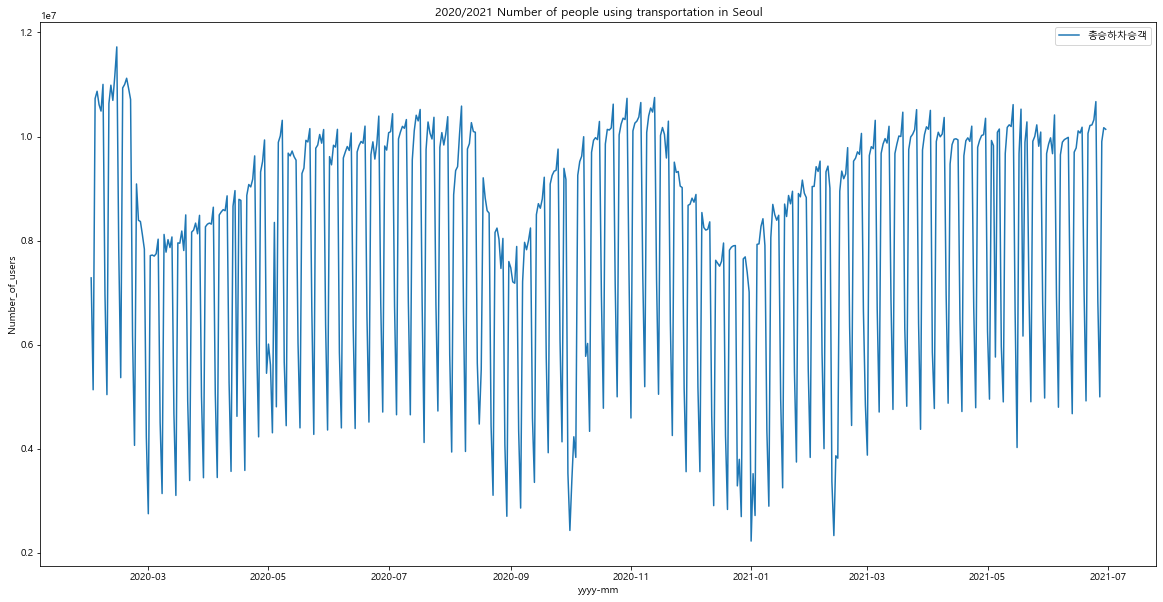

In [73]:
plt.figure(figsize=(20,10))
plt.plot(subDay['사용일자'],subDay['승하차총승객수'], label = '총승하차승객')
plt.grid()
plt.legend(loc=1)
plt.xlabel('yyyy-mm')
plt.ylabel('Number_of_users')
plt.title('2020/2021 Number of people using transportation in Seoul')
plt.grid()
plt.show()


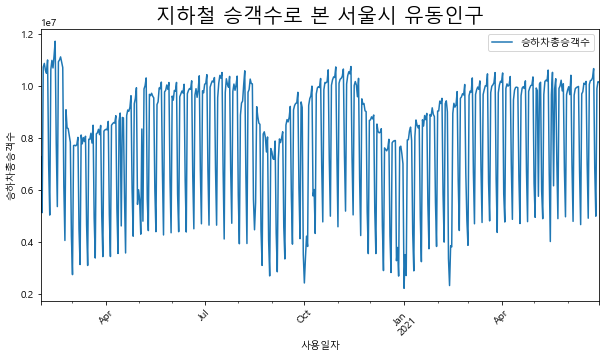

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

# 일자 인덱스 지정

subDay.plot(x='사용일자',y='승하차총승객수', figsize=(10, 5))
plt.ylabel('승하차총승객수', fontsize=10)
plt.xlabel('사용일자', fontsize=10)
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.title('지하철 승객수로 본 서울시 유동인구',fontsize=20) ## 타이틀 설정

plt.show()

### 자치구별 코로나 데이터 사용하기
1. 파일 불러오기
2. 결측값('자치구 기준일'이 '20'으로 되어있는 데이터) 제거
3. '자치구 기준일' 기준으로 역순 정렬
4. '자치구 기준일' date 타입으로 변환
5. 신규확진자수(추가)만 추출해 데이터프레임 생성
6. 서울 전체 신규확진자수(sum)구해서 일별로 '서울신규확진자수'컬럼 생성
7. 누적확진자수(전체)만 추출해 데이터프레임 생성
8. 서울 전체 누적확진자수(sum)구해서 일별로 '서울누적확진자수'컬럼 생성
5.시각화
- 서울 전체 일별 누적확진자수 그래프
- 서울 전체 일별 신규확진자수 그래프
- 자치구별 누적확진자수 비교
- 자치구별 신규확진자수 비교
- 구별로 그래프를 따로 만들어 누적확진자수 비교

#### 누적확진자 그래프 시각화

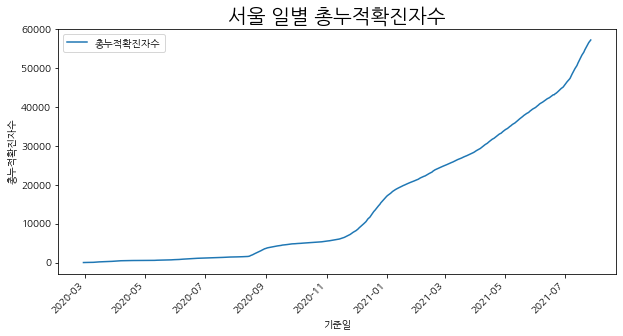

In [71]:
def cumulative_corona() :
    import pandas as pd
    
    # csv 파일 불러오기 ----------------------------------------------
    file_path = 'C:\\Users\\82102\\PycharmProjects\\python_base\\corona_data\\서울특별시 코로나19 자치구별 확진자 발생동향.csv'
    df = pd.read_csv(file_path, encoding = 'CP949', index_col = False)
    
   # 결측값 제거 -----------------------------------------------------
    na_index = df[df['자치구 기준일'] == '20'].index #자치구 기준일이 20인 데이터의 인덱스를 추출
   # print(na_index)
    covData = df.drop(na_index)
   # print(covData.info())

    # '자치구 기준일' data 타입으로 변환 ------------------------------
    covData['자치구 기준일'] = pd.to_datetime(covData['자치구 기준일'])
    
    # 오래된 날짜 순서로 정렬 -----------------------------------------
    covData = covData.sort_values(by = ['자치구 기준일'])
    
    # 자치구별 누적확진자수만 추출해 데이터프레임생성 -----------------
    cumulative = covData.filter(regex='기준일|전체')
    # print(cumulative.head())
    
    pd.set_option('mode.chained_assignment',  None) # ↓자꾸 에러떠서 경고문 끔
    # 서울시 전체 누적확진자수 컬럼 추가
    # print(cumulative.info())
    cumulative['총누적확진자수'] = cumulative.iloc[:,1:26].sum(axis=1)
    # print(cumulative.tail())
    
    # 자치구별 신규확진자수 추출해 데이터프레임생성 -------------------
    new = covData.filter(regex='기준일|추가')
    new['총신규확진자수'] = new.iloc[:,1:26].sum(axis=1)
   # print(new.head())

    #시각화 -----------------------------------------------------------
    import matplotlib.pyplot as plt       
    from matplotlib import rcParams
    rcParams['axes.unicode_minus'] = False
    plt.rc('font', family='NanumGothic')
    
    # 1. 서울 전체 누적확진자수 그래프 ---------------------------------
    # 인덱스 설정
    # 기준일 컬럼을 인덱스로 지정
    cumulative.set_index('자치구 기준일', inplace=True)
    
    # 그래프 생성
    cumulative.plot(y='총누적확진자수', figsize=(10, 5))
    plt.ylabel('총누적확진자수', fontsize=10)
    plt.xlabel('기준일', fontsize=10)
    plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
    plt.title('서울 일별 총누적확진자수',fontsize=20) ## 타이틀 설정
    
    plt.show()
    

cumulative_corona()

#### 신규확진자 그래프 시각화

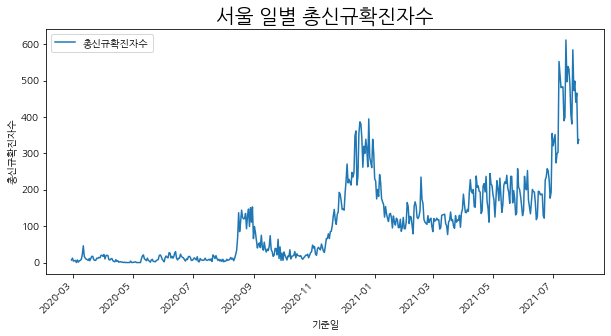

In [84]:
import pandas as pd
    
# csv 파일 불러오기 ----------------------------------------------
file_path = 'C:\\Users\\82102\\PycharmProjects\\python_base\\corona_data\\서울특별시 코로나19 자치구별 확진자 발생동향.csv'
df = pd.read_csv(file_path, encoding = 'CP949', index_col = False)
    
# 결측값 제거 -----------------------------------------------------
na_index = df[df['자치구 기준일'] == '20'].index #자치구 기준일이 20인 데이터의 인덱스를 추출
# print(na_index)
covData = df.drop(na_index)
# print(covData.info())

# '자치구 기준일' data 타입으로 변환 ------------------------------
covData['자치구 기준일'] = pd.to_datetime(covData['자치구 기준일'])
    
# 오래된 날짜 순서로 정렬 -----------------------------------------
covData = covData.sort_values(by = ['자치구 기준일'])
    
   
pd.set_option('mode.chained_assignment',  None) # ↓자꾸 에러떠서 경고문 끔
  
# 자치구별 신규확진자수 추출해 데이터프레임생성 -------------------
new = covData.filter(regex='기준일|추가')
new['총신규확진자수'] = new.iloc[:,1:26].sum(axis=1)
# print(new.head())

#시각화 -----------------------------------------------------------
import matplotlib.pyplot as plt       
from matplotlib import rcParams
rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumGothic')
    
# 1. 서울 전체 누적확진자수 그래프 ---------------------------------
# 인덱스 설정
# 기준일 컬럼을 인덱스로 지정
new.set_index('자치구 기준일', inplace=True)
    
# 그래프 생성
new.plot(y='총신규확진자수', figsize=(10, 5))
plt.ylabel('총신규확진자수', fontsize=10)
plt.xlabel('기준일', fontsize=10)
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
plt.title('서울 일별 총신규확진자수',fontsize=20) ## 타이틀 설정

plt.show()
    

#### 서울시 확진자수 & 사회적 거리두기 변화단계 접목

In [86]:
print(subDay.head())
print(new.info())

        사용일자   승하차총승객수
0 2020-02-01   7283952
1 2020-02-02   5134050
2 2020-02-03  10729908
3 2020-02-04  10869656
4 2020-02-05  10611929
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2020-02-28 10:00:00 to 2021-07-27 00:00:00
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   종로구 추가   517 non-null    float64
 1   중구 추가    517 non-null    float64
 2   용산구 추가   517 non-null    float64
 3   성동구 추가   517 non-null    float64
 4   광진구 추가   517 non-null    float64
 5   동대문구 추가  517 non-null    float64
 6   중랑구 추가   517 non-null    float64
 7   성북구 추가   517 non-null    float64
 8   강북구 추가   517 non-null    float64
 9   도봉구 추가   517 non-null    float64
 10  노원구 추가   517 non-null    float64
 11  은평구 추가   517 non-null    float64
 12  서대문구 추가  517 non-null    float64
 13  마포구 추가   517 non-null    float64
 14  양천구 추가   517 non-null    float64
 15  강서구 추가   517 non-null    float64
 16  구로구 추가   517 non-null    float6

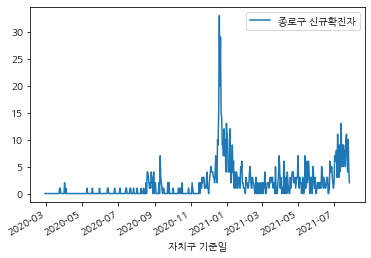

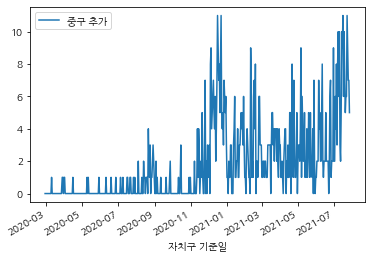

In [118]:
import numpy as np
import matplotlib.pyplot as plt

new.plot(y='종로구 추가',label= '종로구 신규확진자')
new.plot(y='중구 추가')

plt.show()